In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
get_ipython().run_line_magic('pylab', 'inline')
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 100

In [3]:
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [4]:
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState
    return episode

In [5]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

 30%|████████████████████████▎                                                        | 30/100 [00:00<00:06, 10.84it/s]

[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], 

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.90it/s]


[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], 

In [6]:
V

array([[ 0.        , -1.65037101, -2.22739026, -2.35928404],
       [-1.73071048, -2.24680102, -2.31959085, -2.1452142 ],
       [-2.21525218, -2.30874078, -2.07468513, -1.57510741],
       [-2.37246561, -2.22289697, -1.61489985,  0.        ]])

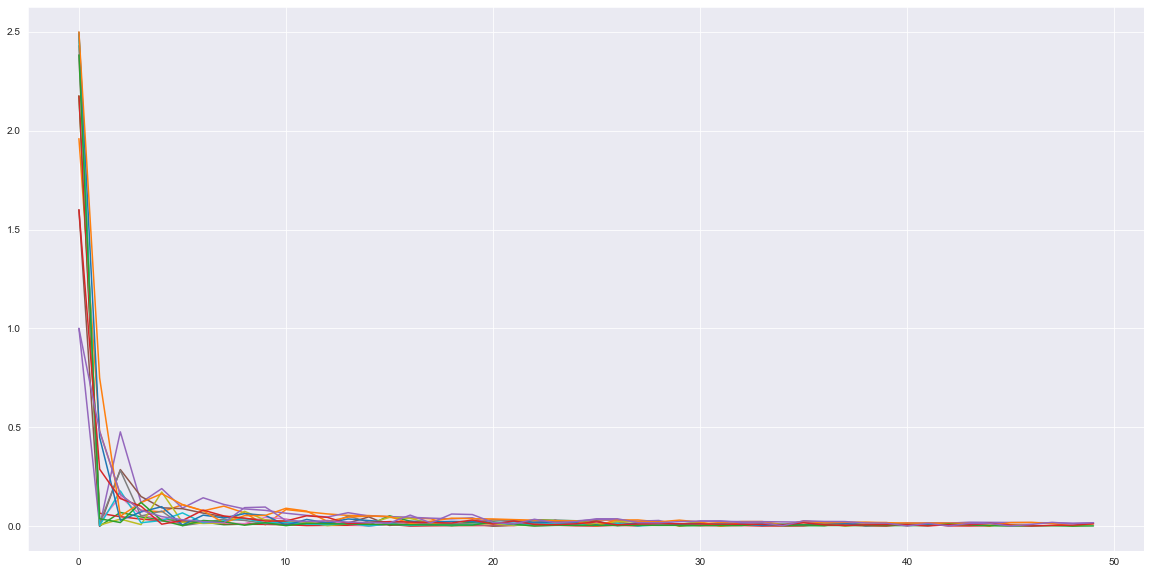

In [7]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

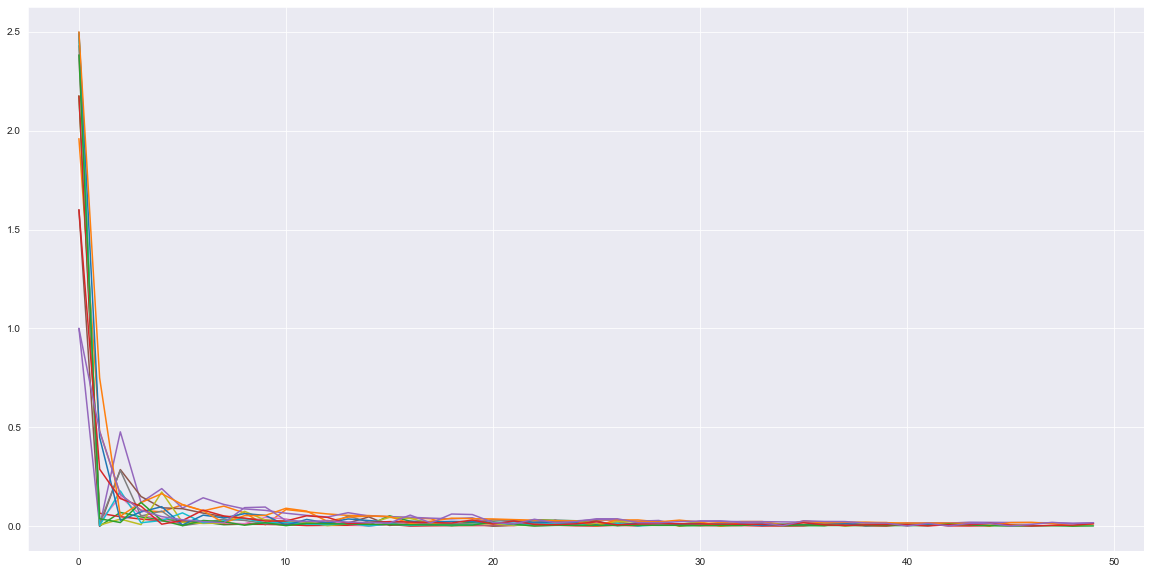

In [8]:

# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)